# Cálculo da taxa máxima de retransmissão para evitar surtos

Em uma turma de mestrado da UnB, foi constatado que, dos 30 alunos que foram à aula, 7 pegaram Covid. O (boletim epidemiológico 757) [https://www.saude.df.gov.br/documents/37103/0/Boletim_Covid_757.pdf] revela que, no período dessa amostragem, a taxa de transmissão estava em 1,43.

Com isso, as aulas tiveram que ser modificadas para a modalidade remota, uma vez que um surto de 3 alunos infectados exige a suspensão de aulas presenciais.

Assumindo que há uma relação diretamente proporcional entre a probabilidade de ser infectado e e a taxa de transmissão, calcule a taxa de transmissão máxima para que a chance de ter mais de dois alunos infectados na sala fique inferior a 5%.

## Resolução

Dos dados, verificamos que a probabilidade de contaminação efetiva dos alunos é recuperada pela divisão da quantidade de infectados pela quantidade total de alunos, ou seja:

$$
p_{contaminacao}=\frac{contaminados}{total}
$$


In [64]:
totalDeAlunos = 30;
alunosContaminados = 7;
taxaDeTransmissaoMedida = 1.43;
print('Alunos contaminados: ', alunosContaminados);
print('Total de alunos na sala: ', totalDeAlunos);
probabilidadeDeContaminacao = (alunosContaminados/totalDeAlunos).__round__(2);
print('Probabilidade de contaminação medida: ', probabilidadeDeContaminacao);
print('Taxa de transmissão medida: ', taxaDeTransmissaoMedida);


Alunos contaminados:  5
Total de alunos na sala:  50
Probabilidade de contaminação medida:  0.1
Taxa de transmissão medida:  0.43


É possível modelar a probabilidade de encontrar uma pessoa infectada por Covid  pela distribuição binomial, pois:

- O espaço amostral é finito (30 pessoas)
- Cada tentativa é independente da outra
- Há duas possibilidades apenas no teste: ou a pessoa está com Covid, ou não está
- A probabilidade de sucesso é constante nas condições do experimento

Dessa forma, para as condições elencadas até aqui, teríamos a seguinte representação da distribuição:


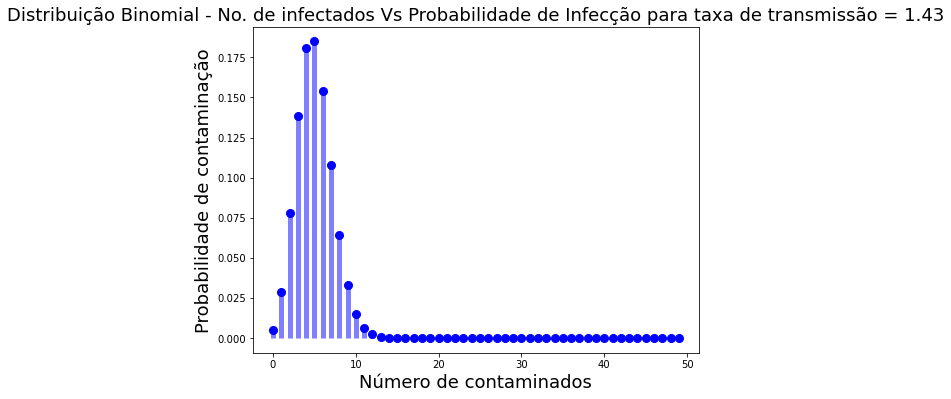

In [65]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
#
# X = Discrete random variable representing number of successes
# p = Probability of the success
#
X = np.arange(0,totalDeAlunos)

p = probabilidadeDeContaminacao
n = totalDeAlunos
#
# Calculate binomial probability distribution
#
binom_pd = binom.pmf(X, n, p)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, binom_pd, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probabilidade de contaminação", fontsize="18")
plt.xlabel("Número de contaminados", fontsize="18")
plt.title("Distribuição Binomial - No. de infectados Vs Probabilidade de Infecção para taxa de transmissão = 1.43", fontsize="18")
ax.vlines(X, 0, binom_pd, colors='b', lw=5, alpha=0.5)

A probabilidade de termos no máximo 2 infectados por Covid pode ser encontrada através da Cumulative Distribution Function, utilizando a função `cdf`:

In [66]:
probabilidadeMaximo2Infectados = (binom.cdf(2,n, p)*100).round(2)
print('Probabilidade de ter 2 ou menos alunos infectados: ', probabilidadeMaximo2Infectados, '%')

Probabilidade de ter 2 ou menos alunos infectados:  11.17 %


Dessa forma, temos que chance de termos 3 ou mais alunos infectados é a probabilidade total (100%) menos a probabilidade de ter 2 ou menos. Ou seja:

In [67]:
probabilidade3OuMaisAlunos = 100 - probabilidadeMaximo2Infectados
print('Probabilidade de termos 3 ou mais alunos infectados com Covid com taxa de transmissão de 1.43: ', probabilidade3OuMaisAlunos)

Probabilidade de termos 3 ou mais alunos infectados com Covid com taxa de transmissão de 1.43:  88.83



A premissa de que há uma relação diretamente proporcional entre a taxa de transmissão e a probabilidade de contaminação nos permite descrever o seguinte modelo:

$$
\frac{p_{contaminacaoMedida}}{p_{contaminacao}}=\frac{t_{tramissaoMedida}}{t_{transmissao}} \rightarrow p_{contaminacao} = \frac{p_{contaminacaoMedida}\cdot t_{transmissao}}{t_{transmissaoMedida}} 
$$
$$
p_{contaminacao} = \left ( \frac{p_{contaminacaoMedida}}{t_{transmissaoMedida}} \right )\cdot t_{transmissao}
$$

Onde podemos chamar o elemento $$ \left ( \frac{p_{contaminacaoMedida}}{t_{transmissaoMedida}} \right ) $$ de *coeficiente de transmissão*

In [68]:
coeficienteDeTransmissao = (probabilidadeDeContaminacao/taxaDeTransmissaoMedida).__round__(2);
print('Coeficiente de transmissão calculado: ', coeficienteDeTransmissao);

Coeficiente de transmissão calculado:  0.23


Dessa forma, podemos criar um gráfico que mostre a relação entre a probabilidade de ter 3 ou mais alunos infectados pela taxa de transmissão, e com isso, achar a taxa de transmissão máxima admitida para a restrição de 5%:

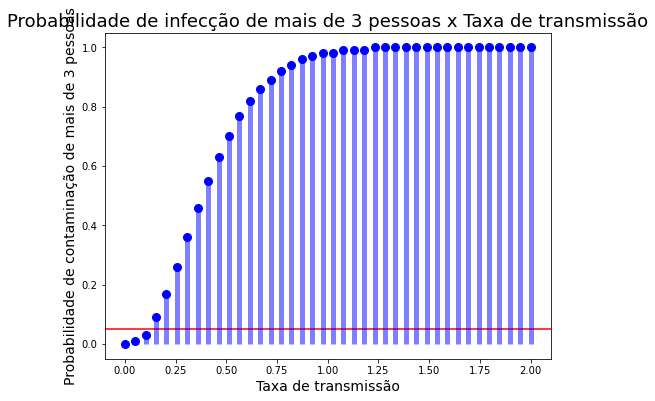

In [69]:
def calcularProbabilidadePeloMenos3PelaTransmissao(taxaTransmissao, quantidadeAlunos, maximoInfectados):
    probabilidadeTxTransmissao = coeficienteDeTransmissao * taxaTransmissao
    probabilidadeMax2Infectados = binom.cdf(maximoInfectados,quantidadeAlunos, probabilidadeTxTransmissao).round(2)
    return 1-probabilidadeMax2Infectados;

XtaxaDeTransmissao = np.linspace(0,2, 40)
Yprobabilidades = []

for txTransmissao in XtaxaDeTransmissao:
    Yprobabilidades.append(calcularProbabilidadePeloMenos3PelaTransmissao(txTransmissao, 30, 2))

fig_transmissao, ax_transmissao = plt.subplots(1, 1, figsize=(8, 6))
ax_transmissao.plot(XtaxaDeTransmissao, Yprobabilidades, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probabilidade de contaminação de mais de 3 pessoas", fontsize="14")
plt.xlabel("Taxa de transmissão", fontsize="14")
plt.axhline(y=0.05, color='r', linestyle='-')
plt.title("Probabilidade de infecção de mais de 3 pessoas x Taxa de transmissão", fontsize="18")
ax_transmissao.vlines(XtaxaDeTransmissao, 0, Yprobabilidades, colors='b', lw=5, alpha=0.5)
